In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from env import host, user, password
import acquire
import wrangle
import prepare

import warnings
warnings.filterwarnings("ignore")

In [2]:
# df = acquire.get_zillow_data()

# df = wrangle.handle_nulls(df)

# df.isnull().sum()

In [3]:
# df = wrangle.prepare_zillow(df)

# df = prepare.transaction_month(df)

# df = prepare.tax_rate(df)

# df = prepare.better_names(df)

# df.head()

In [4]:
# df.to_csv('zillow_df.csv')

In [5]:
df = pd.read_csv('zillow_df.csv')

In [6]:
df.head()

,Unnamed: 0,longitude,latitude,age,month,bedroomcnt,bathroomcnt,square_footage,lot_size,house_value,land_value,full_value,tax_rate,roomcnt,Los_Angeles,Orange,Ventura,logerror
0,0,-117869207.0,33634931.0,19.0,1,4.0,3.5,3100.0,4506.0,485713.0,537569.0,1023282.0,0.010763,0.0,0,1,0,0.025595
1,1,-119281531.0,34449266.0,50.0,1,2.0,1.0,1465.0,12647.0,88000.0,376000.0,464000.0,0.012225,5.0,0,0,1,0.055619
2,2,-117823170.0,33886168.0,55.0,1,3.0,2.0,1243.0,8432.0,85289.0,479489.0,564778.0,0.011488,6.0,0,1,0,0.005383
3,3,-118240722.0,34245180.0,47.0,1,4.0,3.0,2376.0,13038.0,108918.0,36225.0,145143.0,0.012247,0.0,1,0,0,-0.103410
4,4,-118414640.0,34185120.0,53.0,1,3.0,3.0,1312.0,278581.0,73681.0,45726.0,119407.0,0.012846,0.0,1,0,0,0.006940


In [7]:
df = df.drop(df.columns[0], axis=1)

In [8]:
df.head()

,longitude,latitude,age,month,bedroomcnt,bathroomcnt,square_footage,lot_size,house_value,land_value,full_value,tax_rate,roomcnt,Los_Angeles,Orange,Ventura,logerror
0,-117869207.0,33634931.0,19.0,1,4.0,3.5,3100.0,4506.0,485713.0,537569.0,1023282.0,0.010763,0.0,0,1,0,0.025595
1,-119281531.0,34449266.0,50.0,1,2.0,1.0,1465.0,12647.0,88000.0,376000.0,464000.0,0.012225,5.0,0,0,1,0.055619
2,-117823170.0,33886168.0,55.0,1,3.0,2.0,1243.0,8432.0,85289.0,479489.0,564778.0,0.011488,6.0,0,1,0,0.005383
3,-118240722.0,34245180.0,47.0,1,4.0,3.0,2376.0,13038.0,108918.0,36225.0,145143.0,0.012247,0.0,1,0,0,-0.103410
4,-118414640.0,34185120.0,53.0,1,3.0,3.0,1312.0,278581.0,73681.0,45726.0,119407.0,0.012846,0.0,1,0,0,0.006940


In [9]:
df['bed_bath_ratio'] = df.bedroomcnt/df.bathroomcnt

In [10]:
X = df[['longitude', 'latitude', 'age', 'month', 'bedroomcnt',
        'bathroomcnt', 'square_footage', 'lot_size', 'house_value',
        'land_value', 'full_value', 'tax_rate', 'roomcnt',
        'Los_Angeles', 'Orange', 'Ventura']]
y = df[['logerror']]

In [11]:
print(X.shape)
print(y.shape)

(76659, 16)
(76659, 1)


## Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 121)

In [13]:
X_train.head()

,longitude,latitude,age,month,bedroomcnt,bathroomcnt,square_footage,lot_size,house_value,land_value,full_value,tax_rate,roomcnt,Los_Angeles,Orange,Ventura
21711,-119173645.0,34238098.0,7.0,3,4.0,2.5,1464.0,7201.0,153720.0,153720.0,307440.0,0.024141,6.0,0,0,1
72428,-118183524.0,34122442.0,60.0,9,3.0,2.0,1266.0,2911.0,93588.0,74869.0,168457.0,0.012600,0.0,1,0,0
20516,-118105067.0,34053353.0,85.0,3,2.0,2.0,823.0,7564.0,86795.0,181819.0,268614.0,0.012805,0.0,1,0,0
42112,-117971000.0,34065700.0,33.0,6,2.0,2.0,936.0,50291.0,99368.0,42578.0,141946.0,0.014431,0.0,1,0,0
6853,-118325639.0,33798484.0,41.0,1,4.0,3.0,2060.0,7592.0,100601.0,307982.0,408583.0,0.012669,0.0,1,0,0


## Scale

In [14]:
# scaler = MinMaxScaler(copy=True)
# X_train[['square_footage', 'lot_size', 'house_value', 'land_value', 'full_value']] = (scaler.fit_transform(X_train[['square_footage', 'lot_size', 'house_value', 'land_value', 'full_value']]))
# train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns.values).set_index([X_train.index.values])
# test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns.values).set_index([X_test.index.values])
# train_scaled.head()

scaler = MinMaxScaler(copy=True, feature_range=(0,1)).fit(X_train)

train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns.values).set_index([X_train.index.values])

test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns.values).set_index([X_test.index.values])

train_scaled.head()


,longitude,latitude,age,month,bedroomcnt,bathroomcnt,square_footage,lot_size,house_value,land_value,full_value,tax_rate,roomcnt,Los_Angeles,Orange,Ventura
21711,0.157109,0.607455,0.031250,0.250,0.200000,0.088235,0.056347,0.000971,0.016757,0.003120,0.006246,0.029456,0.4,0.0,0.0,1.0
72428,0.672587,0.529268,0.307292,1.000,0.133333,0.058824,0.047217,0.000355,0.010196,0.001509,0.003413,0.015319,0.0,1.0,0.0,0.0
20516,0.713434,0.482563,0.437500,0.250,0.066667,0.058824,0.026790,0.001023,0.009455,0.003694,0.005455,0.015570,0.0,1.0,0.0,0.0
42112,0.783232,0.490910,0.166667,0.625,0.066667,0.058824,0.032001,0.007152,0.010826,0.000849,0.002873,0.017562,0.0,1.0,0.0,0.0
6853,0.598599,0.310265,0.208333,0.000,0.200000,0.117647,0.083829,0.001027,0.010961,0.006271,0.008308,0.015404,0.0,1.0,0.0,0.0


     k          sse
0    2  3505.111754
1    3  2203.060310
2    4  1358.422878
3    5  1005.138149
4    6   766.344154
5    7   607.354538
6    8   524.452058
7    9   474.115397
8   10   431.372855
9   11   397.835759
10  12   361.985342
11  13   333.047190
12  14   303.837561
13  15   282.005697
14  16   261.169167
15  17   244.318503
16  18   234.675743
17  19   221.057026


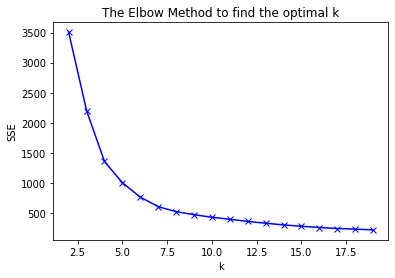

In [16]:
cluster_vars = train_scaled[['latitude', 'longitude', 'roomcnt']]

ks = range(2,20)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cluster_vars)

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method to find the optimal k')
plt.show()

In [17]:
# find clusters

kmeans = KMeans(n_clusters=10, random_state = 447)
train_cluster_array = kmeans.fit_predict(train_scaled[['longitude', 'latitude', 'roomcnt']])
test_cluster_array = kmeans.predict(test_scaled[['longitude', 'latitude', 'roomcnt']])    

train_cluster_array

array([2, 0, 6, ..., 7, 5, 6], dtype=int32)

In [ ]:
# create df of cluster id with each observation

train_clusters = pd.DataFrame(train_cluster_array, columns = ['area_cluster_id'], index = train_scaled.index)

test_clusters = pd.DataFrame(test_cluster_array, columns = ['area_cluster_id'], index = test_scaled.index)

train_clusters.head()

In [ ]:
X_train = pd.concat([X_train, train_clusters], axis = 1)
train_scaled = pd.concat([train_scaled, train_clusters], axis = 1)
X_test = pd.concat([X_test, test_clusters], axis = 1)
test_scaled = pd.concat([test_scaled, test_clusters], axis = 1)

In [ ]:
X_train.head()

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=('centroid_latitude', 'centroid_longitude', 'centroid_room_count')).reset_index()
centroids.rename(columns = {'index': 'area_cluster_id'}, inplace = True)

In [ ]:
centroids

In [ ]:
X_train = X_train.merge(centroids, left_on = 'area_cluster_id', right_on ='area_cluster_id')
train_scaled = pd.merge(train_scaled, centroids, how = 'left')
X_test = pd.merge(X_test, centroids, how = 'left')
test_scaled = pd.merge(test_scaled, centroids, how = 'left')

In [ ]:
train_scaled.head()